In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def Get_weighted_average(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_average(value1,error1,value2,error2):
    sum_mean = value1/error1**2+value2/error2**2
    sum_sigma = 1/error1**2+1/error2**2
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
 
#def Get_ratio_error(value1,error1,value2,error2):
#    return value1/value2,(value1/value2)*math.sqrt((error1/value1)**2+(error2/value2)**2)
#this is actually same method


In [3]:

df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/test_lowQ2_fine_2011.dat',delim_whitespace=True)
df_xs_kT4_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/test_lowQ2_fine_2015.dat',delim_whitespace=True)
#df_xs_default2_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/test_lowQ2_fine.dat',delim_whitespace=True)
#df_xs_default2_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/test_fine_default_small_kT_pT.dat',delim_whitespace=True)

#df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/test_lowQ2_fine_mkTmpT.dat',delim_whitespace=True)
#df_xs_kT4_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/test_lowQ2_fine_mkTppT.dat',delim_whitespace=True)
#df_xs_default2_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/test_lowQ2_fine_pkTppT.dat',delim_whitespace=True)


df_xs_kT8_zQ2xbjPhT.head()
df_xs_kT4_zQ2xbjPhT.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.125,-2.984513,0.48445,0.35,1.25,0.1,FUUT,0.001193,0.0001,0.0,0.0,neutron,pi+,solid,0.0001
1,1,11.0,0.125,-2.670354,0.48445,0.35,1.25,0.1,FUUT,0.001193,0.0001,0.0,0.0,neutron,pi+,solid,0.0001
2,2,11.0,0.125,-2.356194,0.48445,0.35,1.25,0.1,FUUT,0.001193,0.0001,0.0,0.0,neutron,pi+,solid,0.0001
3,3,11.0,0.125,-2.042035,0.48445,0.35,1.25,0.1,FUUT,0.001193,0.0001,0.0,0.0,neutron,pi+,solid,0.0001
4,4,11.0,0.125,-1.727876,0.48445,0.35,1.25,0.1,FUUT,0.001193,0.0001,0.0,0.0,neutron,pi+,solid,0.0001


In [4]:
#df_xs_kT6_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/simenhanced_1xs.dat',delim_whitespace=True)
#df_xs_kT6_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/test_fine_default.dat',delim_whitespace=True)
df_xs_kT6_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/test_lowQ2_fine.dat',delim_whitespace=True)
#df_xs_kT6_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/test_lowQ2_fine_pkTmpT.dat',delim_whitespace=True)

df_xs_kT6_zQ2xbjPhT.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.125,-2.984513,0.48445,0.35,1.25,0.1,FUUT,0.00122,0.0001,0.0,0.0,neutron,pi+,solid,0.0001
1,1,11.0,0.125,-2.670354,0.48445,0.35,1.25,0.1,FUUT,0.00122,0.0001,0.0,0.0,neutron,pi+,solid,0.0001
2,2,11.0,0.125,-2.356194,0.48445,0.35,1.25,0.1,FUUT,0.00122,0.0001,0.0,0.0,neutron,pi+,solid,0.0001
3,3,11.0,0.125,-2.042035,0.48445,0.35,1.25,0.1,FUUT,0.00122,0.0001,0.0,0.0,neutron,pi+,solid,0.0001
4,4,11.0,0.125,-1.727876,0.48445,0.35,1.25,0.1,FUUT,0.00122,0.0001,0.0,0.0,neutron,pi+,solid,0.0001


In [5]:
PI = math.pi
print(PI)
z_cuts=[0.3,0.4,0.5,0.6]
#z_cuts=[0.3,0.35,0.4,0.45]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
xbj_cuts=[0,0.25]
#xbj_cuts=[0.25,0.4]
#PhT_cuts = [0,0.2]
PhT_cuts = [0.2,0.4]
#PhT_cuts=[0.2,0.6]
#PhT_cuts=[0.2,0.4]
#phih_bins = [-3.14,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3.14]
#phih_bins =[-PI,-4*PI/5,-3*PI/5,-2*PI/5,-PI/5,PI/5,2*PI/5,3*PI/5,4*PI/5,PI]
phih_bins =[-PI,-0.9*PI,-0.8*PI,-0.7*PI,-0.6*PI,-0.5*PI,-0.4*PI,-0.3*PI,-0.2*PI,-0.1*PI,0,0.1*PI,0.2*PI,0.3*PI,0.4*PI,0.5*PI,0.6*PI,0.7*PI,0.8*PI,0.9*PI,PI]
df_xs_kT8_zQ2=df_xs_kT8_zQ2xbjPhT[(df_xs_kT8_zQ2xbjPhT['x']>xbj_cuts[0])&(df_xs_kT8_zQ2xbjPhT['x']<xbj_cuts[1])&(df_xs_kT8_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_xs_kT8_zQ2xbjPhT['pT']<PhT_cuts[1])]
df_xs_kT4_zQ2=df_xs_kT4_zQ2xbjPhT[(df_xs_kT4_zQ2xbjPhT['x']>xbj_cuts[0])&(df_xs_kT4_zQ2xbjPhT['x']<xbj_cuts[1])&(df_xs_kT4_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_xs_kT4_zQ2xbjPhT['pT']<PhT_cuts[1])]
df_xs_kT6_zQ2=df_xs_kT6_zQ2xbjPhT[(df_xs_kT6_zQ2xbjPhT['x']>xbj_cuts[0])&(df_xs_kT6_zQ2xbjPhT['x']<xbj_cuts[1])&(df_xs_kT6_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_xs_kT6_zQ2xbjPhT['pT']<PhT_cuts[1])]
#df_xs_default2_zQ2=df_xs_default2_zQ2xbjPhT[(df_xs_default2_zQ2xbjPhT['x']>xbj_cuts[0])&(df_xs_default2_zQ2xbjPhT['x']<xbj_cuts[1])&(df_xs_default2_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_xs_default2_zQ2xbjPhT['pT']<PhT_cuts[1])]

3.141592653589793


20 20
20 20
20 20
20 20
20 20
20 20
20 20
20 20
20 20
20 20
20 20
20 20


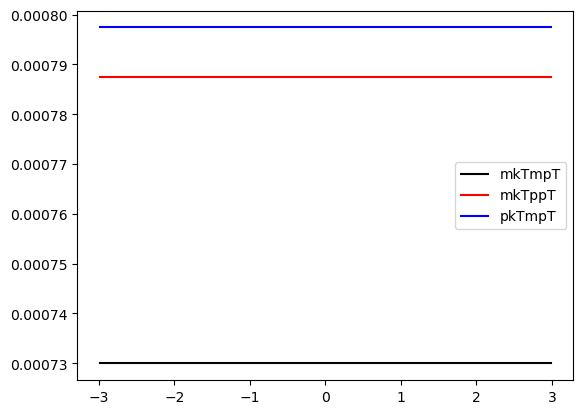

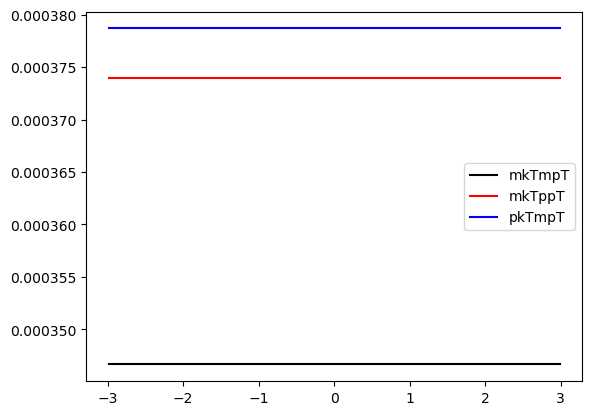

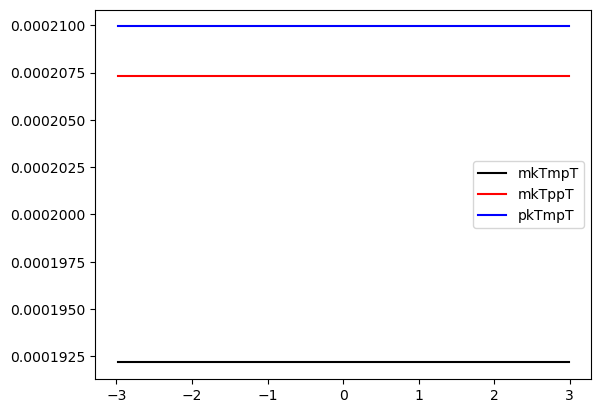

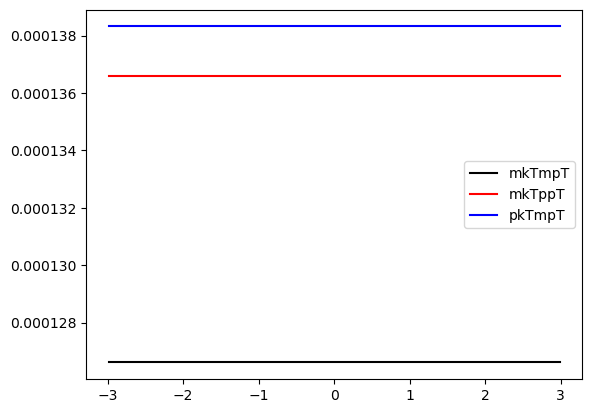

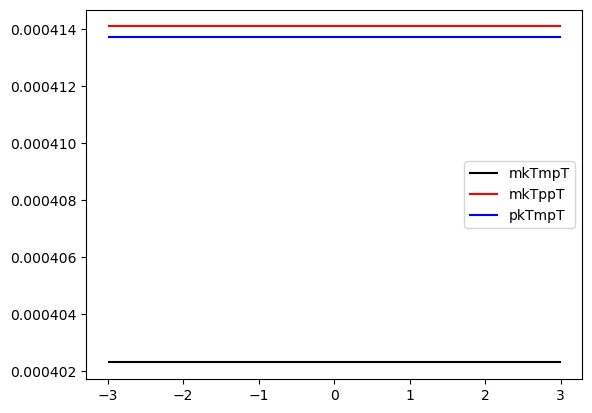

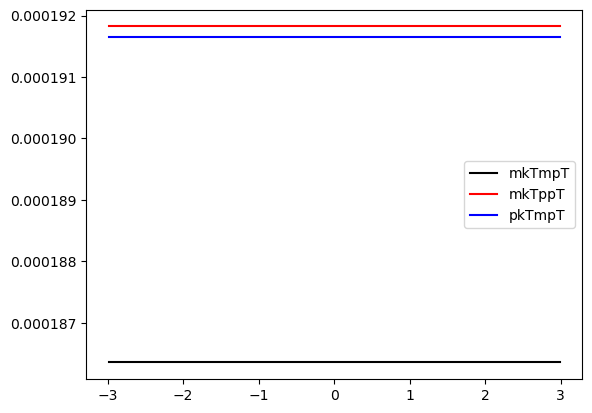

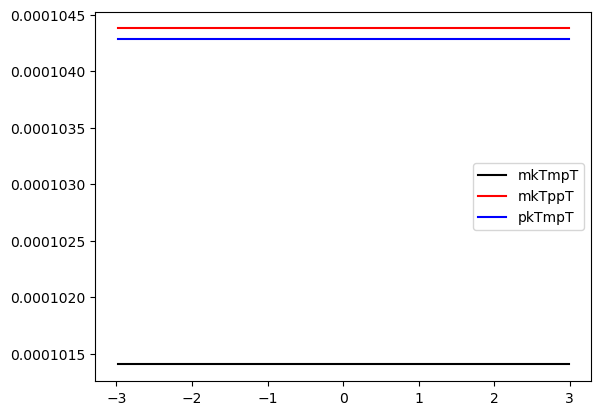

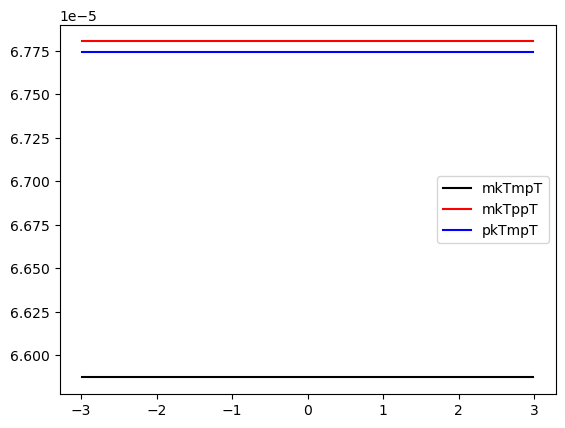

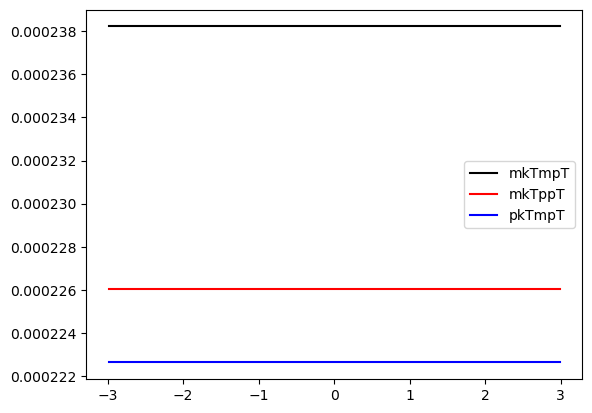

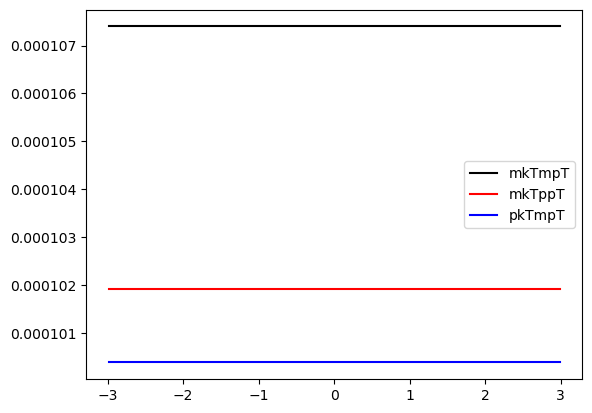

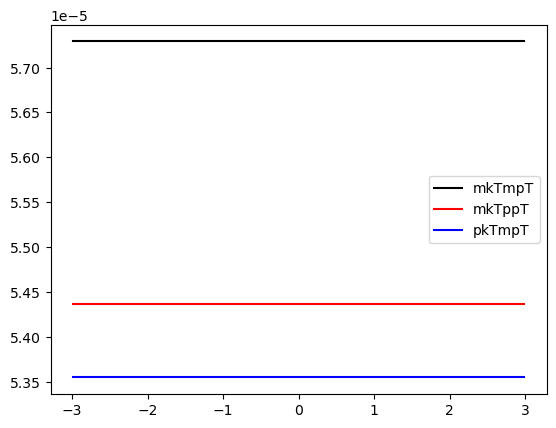

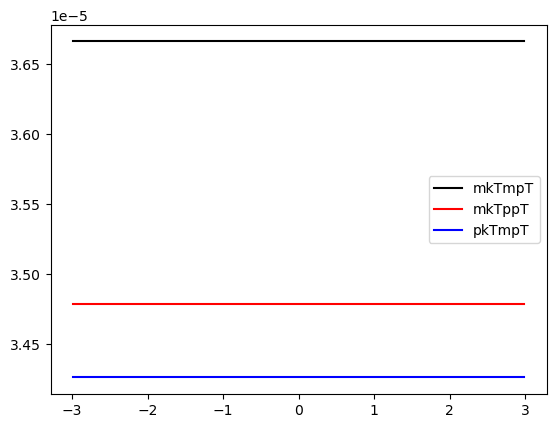

In [6]:

for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        df_xs_kT8=df_xs_kT8_zQ2[(df_xs_kT8_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT8_zQ2['z']<z_cuts[i_z])&(df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2])]
        df_xs_kT4=df_xs_kT4_zQ2[(df_xs_kT4_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT4_zQ2['z']<z_cuts[i_z])&(df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2])]
        df_xs_kT6=df_xs_kT6_zQ2[(df_xs_kT6_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT6_zQ2['z']<z_cuts[i_z])&(df_xs_kT6_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT6_zQ2['Q2']<Q2_cuts[i_Q2])]
        #df_xs_default2=df_xs_default2_zQ2[(df_xs_default2_zQ2['z']>z_cuts[i_z-1])&(df_xs_default2_zQ2['z']<z_cuts[i_z])&(df_xs_default2_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_default2_zQ2['Q2']<Q2_cuts[i_Q2])]
        fig = plt.figure()
        ax = fig.add_subplot()
        phih_kT8 = df_xs_kT8['phih'].to_list()
        Fuu_kT8 = df_xs_kT8['value'].to_list()
        phih_kT4 = df_xs_kT4['phih'].to_list()
        Fuu_kT4 = df_xs_kT4['value'].to_list()
        phih_kT6 = df_xs_kT6['phih'].to_list()
        Fuu_kT6 = df_xs_kT6['value'].to_list()
        #phih_default2 = df_xs_default2['phih'].to_list()
        #Fuu_default2 = df_xs_default2['value'].to_list()
        print(len(phih_kT8),len(phih_kT4))
        #plt.plot(phih_kT8,np.asarray(Fuu_kT8),'k',label='Bacchetta2011')
        #plt.plot(phih_kT4,np.asarray(Fuu_kT4),'r',label='Barone2015')
        #plt.plot(phih_kT6,np.asarray(Fuu_kT6),'b',label='default')
        #plt.plot(phih_default2,np.asarray(Fuu_default2),'m',label='default2')
        plt.plot(phih_kT8,np.asarray(Fuu_kT8),'k',label='mkTmpT')
        plt.plot(phih_kT4,np.asarray(Fuu_kT4),'r',label='mkTppT')
        plt.plot(phih_kT6,np.asarray(Fuu_kT6),'b',label='pkTmpT')
        #plt.plot(phih_default2,np.asarray(Fuu_default2),'m',label='pkTppT')
        plt.legend()
        #for i_phi in np.asarray(phihs):
        #    print(i_phi)
        #for i_phih in phih_bins:
            #plt.axvline(x=i_phih)

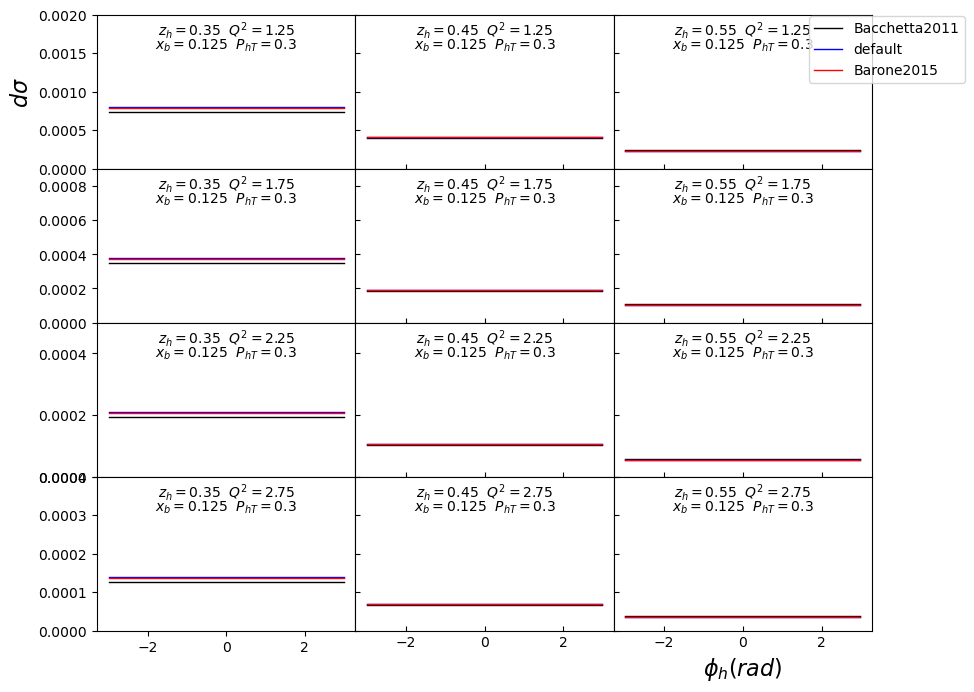

In [7]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#plt.ylabel('Ratio',fontsize=16)
plt.xlabel('$\phi_h(rad)$',fontsize=16)
A_min = -0.0000001;B_min = -0.0000001;C_min=-0.0000001;D_min=-0.0000001 
A_max = 0.002;B_max = 0.0009;C_max=0.0005;D_max=0.0004
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):

        try:
            df_xs_kT8=df_xs_kT8_zQ2[(df_xs_kT8_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT8_zQ2['z']<z_cuts[i_z])&(df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2])]
            df_xs_kT4=df_xs_kT4_zQ2[(df_xs_kT4_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT4_zQ2['z']<z_cuts[i_z])&(df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2])]
            df_xs_kT6=df_xs_kT6_zQ2[(df_xs_kT6_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT6_zQ2['z']<z_cuts[i_z])&(df_xs_kT6_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT6_zQ2['Q2']<Q2_cuts[i_Q2])]
            #df_xs_default2=df_xs_default2_zQ2[(df_xs_default2_zQ2['z']>z_cuts[i_z-1])&(df_xs_default2_zQ2['z']<z_cuts[i_z])&(df_xs_default2_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_default2_zQ2['Q2']<Q2_cuts[i_Q2])]

            phih_kT8 = df_xs_kT8['phih'].to_list()
            Fuu_kT8 = df_xs_kT8['value'].to_list()
            phih_kT4 = df_xs_kT4['phih'].to_list()
            Fuu_kT4 = df_xs_kT4['value'].to_list()
            phih_kT6 = df_xs_kT6['phih'].to_list()
            Fuu_kT6 = df_xs_kT6['value'].to_list()
            #phih_default2 = df_xs_default2['phih'].to_list()
            #Fuu_default2 = df_xs_default2['value'].to_list()
            #plt.plot(phih_kT8,np.asarray(Fuu_kT8),'ro')
            #plt.plot(phih_kT4,np.asarray(Fuu_kT4),'bo')
            #plt.plot(phih_kT6,np.asarray(Fuu_kT6),'ko')      
            
            axs[i_Q2-1][i_z-1].plot(phih_kT8,Fuu_kT8,'k',label='Bacchetta2011',linewidth=1)
            axs[i_Q2-1][i_z-1].plot(phih_kT6,Fuu_kT6,'b',label='default',linewidth=1)
            axs[i_Q2-1][i_z-1].plot(phih_kT4,Fuu_kT4,'r',label='Barone2015',linewidth=1)
            ##axs[i_Q2-1][i_z-1].plot(phih_default2,np.asarray(Fuu_default2),'m',label='default2')
            #axs[i_Q2-1][i_z-1].plot(phih_kT8,np.asarray(Fuu_kT8),'k',label='mkTmpT')
            #axs[i_Q2-1][i_z-1].plot(phih_kT4,np.asarray(Fuu_kT4),'r',label='mkTppT')
            #axs[i_Q2-1][i_z-1].plot(phih_kT6,np.asarray(Fuu_kT6),'b',label='pkTmpT')
            #axs[i_Q2-1][i_z-1].plot(phih_default2,np.asarray(Fuu_default2),'m',label='pkTppT')
            
            axs[i_Q2-1][i_z-1].text(0.5,0.9,r'$z_h={}\ \  Q^2={}$'.format((z_cuts[i_z-1]+z_cuts[i_z])/2,(Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
            axs[i_Q2-1][i_z-1].text(0.5,0.8,r'$x_{{b}}={}\ \  P_{{hT}}={}$'.format((xbj_cuts[0]+xbj_cuts[1])/2,round((PhT_cuts[0]+PhT_cuts[1])/2,1)), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
        except KeyError:
            print('no data here i_z,i_Q2,i_phi',i_z,i_Q2,i_phi)
        #axs[i_Q2-1][i_z-1].set_xlabel('$\phi_h$',fontsize=16)
        #axs[i_Q2-1][i_z-1].set_ylabel('$F_{UU}$',fontsize=16)
        #axs[i_Q2-1][i_z-1].set_ylim(0.7,1.3)
        #axs[i_Q2-1][i_z-1].set_ylim(0.85,1.15)
        #axs[i_Q2-1][i_z-1].set_ylim(-0.01,0.16)
axs[0][0].set_ylabel('$d\sigma$',fontsize=16)
axs[0][2].legend(bbox_to_anchor=(0.75, 1), loc='upper left', borderaxespad=0.1)
axs[0][0].set_ylim(A_min,A_max)
axs[0][1].set_ylim(A_min,A_max)
axs[0][1].tick_params(direction='in',labelleft=False)
axs[0][2].set_ylim(A_min,A_max)
axs[0][2].tick_params(direction='in',labelleft=False)
axs[1][0].set_ylim(B_min,B_max)
axs[1][1].set_ylim(B_min,B_max)
axs[1][1].tick_params(direction='in',labelleft=False)
axs[1][2].set_ylim(B_min,B_max)
axs[1][2].tick_params(direction='in',labelleft=False)
axs[2][0].set_ylim(C_min,C_max)
axs[2][1].set_ylim(C_min,C_max)
axs[2][1].tick_params(direction='in',labelleft=False)
axs[2][2].set_ylim(C_min,C_max)
axs[2][2].tick_params(direction='in',labelleft=False)
axs[3][0].set_ylim(D_min,D_max)
axs[3][1].set_ylim(D_min,D_max)
axs[3][1].tick_params(direction='in',labelleft=False)
axs[3][2].set_ylim(D_min,D_max)
axs[3][2].tick_params(direction='in',labelleft=False)
#axs[0][2].legend()
#plt.savefig('../Unpol_proposal/Materials/results_sys/test_models.pdf')

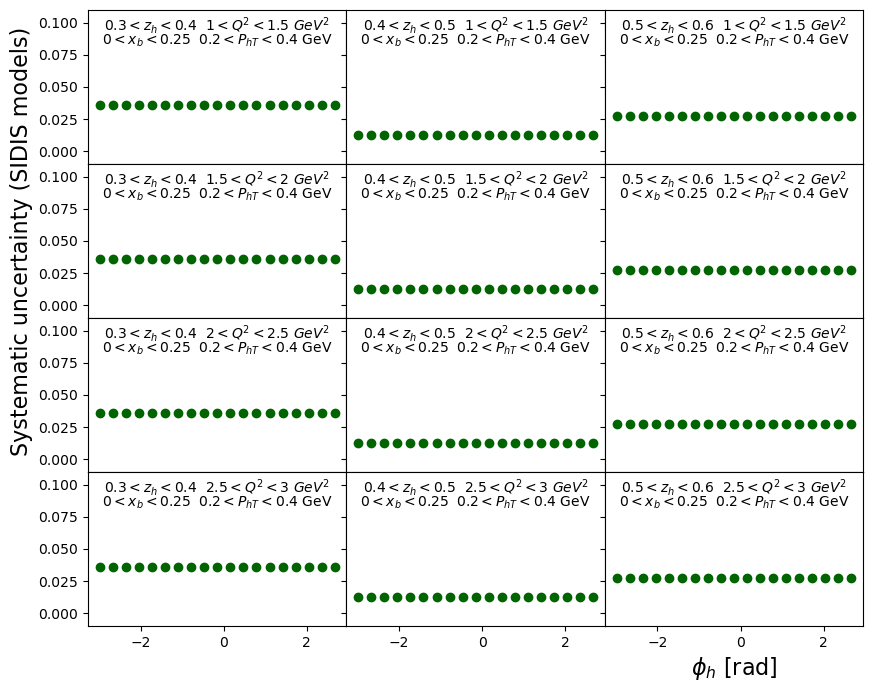

In [8]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharex=True,sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#plt.ylabel('Ratio',fontsize=16)
plt.xlabel('$\phi_h$ [rad]',fontsize=16)
#A_min = -0.0000001;B_min = -0.0000001;C_min=-0.0000001;D_min=-0.0000001 
#A_max = 0.002;B_max = 0.0009;C_max=0.0005;D_max=0.0004
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):

        try:
            df_xs_kT8=df_xs_kT8_zQ2[(df_xs_kT8_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT8_zQ2['z']<z_cuts[i_z])&(df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2])]
            df_xs_kT4=df_xs_kT4_zQ2[(df_xs_kT4_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT4_zQ2['z']<z_cuts[i_z])&(df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2])]
            df_xs_kT6=df_xs_kT6_zQ2[(df_xs_kT6_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT6_zQ2['z']<z_cuts[i_z])&(df_xs_kT6_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT6_zQ2['Q2']<Q2_cuts[i_Q2])]
            #df_xs_default2=df_xs_default2_zQ2[(df_xs_default2_zQ2['z']>z_cuts[i_z-1])&(df_xs_default2_zQ2['z']<z_cuts[i_z])&(df_xs_default2_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_default2_zQ2['Q2']<Q2_cuts[i_Q2])]

            phih_kT8 = df_xs_kT8['phih'].to_list()
            Fuu_kT8 = df_xs_kT8['value'].to_list()
            phih_kT4 = df_xs_kT4['phih'].to_list()
            Fuu_kT4 = df_xs_kT4['value'].to_list()
            phih_kT6 = df_xs_kT6['phih'].to_list()
            Fuu_kT6 = df_xs_kT6['value'].to_list()
            for i_phih in range(0,len(phih_kT8)-1):
                phih=phih_kT8[i_phih]
                _Fuu_kT8=Fuu_kT8[i_phih]
                _Fuu_kT6=Fuu_kT6[i_phih]
                _Fuu_kT4=Fuu_kT4[i_phih]
                ave = 1/3*(_Fuu_kT8+_Fuu_kT6+_Fuu_kT4)
                diff = 1/3*(abs(_Fuu_kT8-ave)/ave+abs(_Fuu_kT6-ave)/ave+abs(_Fuu_kT4-ave)/ave)
                axs[i_Q2-1][i_z-1].plot(phih,diff,'o',color='darkgreen')
                
            
            axs[i_Q2-1][i_z-1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
            axs[i_Q2-1][i_z-1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)      
            #axs[i_Q2-1][i_z-1].text(0.5,0.9,r'$z_h={}\ \  Q^2={}$ $GeV^2$'.format((z_cuts[i_z-1]+z_cuts[i_z])/2,(Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
            #axs[i_Q2-1][i_z-1].text(0.5,0.8,r'$x_{{b}}={}\ \  P_{{hT}}={}$ $GeV$'.format((xbj_cuts[0]+xbj_cuts[1])/2,round((PhT_cuts[0]+PhT_cuts[1])/2,1)), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
        except KeyError:
            print('no data here i_z,i_Q2,i_phi',i_z,i_Q2,i_phi)
        #axs[i_Q2-1][i_z-1].set_xlabel('$\phi_h$',fontsize=16)
        #axs[i_Q2-1][i_z-1].set_ylabel('$F_{UU}$',fontsize=16)
        #axs[i_Q2-1][i_z-1].set_ylim(0.7,1.3)
        #axs[i_Q2-1][i_z-1].set_ylim(0.85,1.15)
        #axs[i_Q2-1][i_z-1].set_ylim(-0.01,0.16)
axs[0][0].set_ylim(-0.01,0.11)
axs[1][0].set_ylabel('Systematic uncertainty (SIDIS models)',fontsize=16)
#axs[0][2].legend()
plt.savefig('../Unpol_proposal/Materials/results_sys/diff_models.pdf')